In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
X=data.drop(columns=['quality'])
y=data['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
#TRAIN lINEAR SVM MODEL
linear_svm=SVC(kernel='linear')
linear_svm.fit(X_train,y_train)


SVC(kernel='linear')

In [11]:
#print classification report 
y_pred = linear_svm.predict(X_test)
print("Linear SVM")
print(classification_report(y_test,y_pred))

Linear SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.79      0.72       135
           6       0.62      0.68      0.65       142
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         3

    accuracy                           0.64       320
   macro avg       0.21      0.25      0.23       320
weighted avg       0.55      0.64      0.59       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


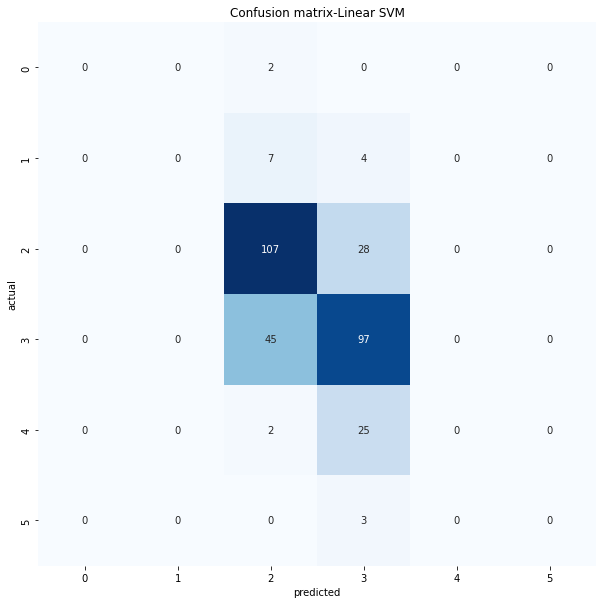

In [12]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=cm, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix-Linear SVM')
plt.show()

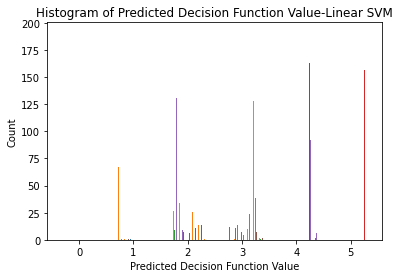

In [13]:

#plot histogram of predicted class probabilities
proba= linear_svm.decision_function(X_test)
plt.hist(proba, bins=50)
plt.xlabel('Predicted Decision Function Value')
plt.ylabel('Count')
plt.title('Histogram of Predicted Decision Function Value-Linear SVM')
plt.show()


In [14]:
#TRAIN  NON LINEAR SVM MODEL
nonlinear_svm = SVC(kernel='rbf', gamma=0.1,C=10)
nonlinear_svm.fit(X_train,y_train)


SVC(C=10, gamma=0.1)

In [15]:
#print classification report 
y_pred = nonlinear_svm.predict(X_test)
print("Non-Linear SVM")
print(classification_report(y_test,y_pred))

Non-Linear SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.09      0.13        11
           5       0.63      0.70      0.67       135
           6       0.63      0.56      0.59       142
           7       0.47      0.59      0.52        27
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.59      0.60      0.59       320



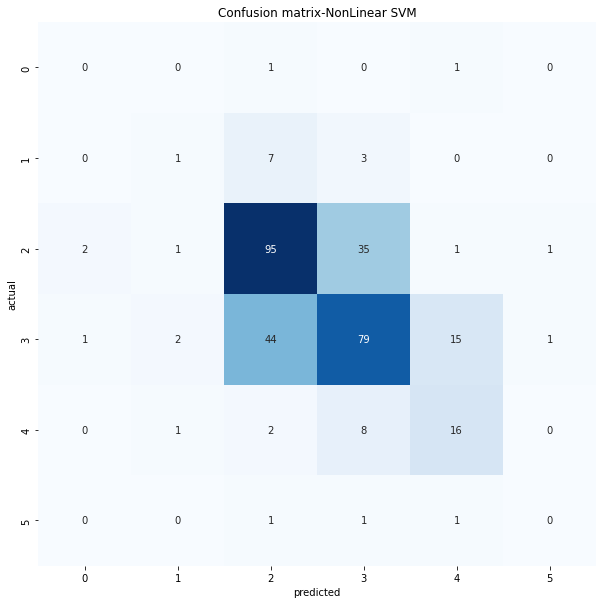

In [16]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=cm, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix-NonLinear SVM')
plt.show()

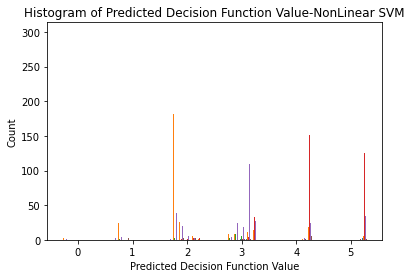

In [17]:

#plot histogram of predicted class probabilities
proba= nonlinear_svm.decision_function(X_test)
plt.hist(proba, bins=50)
plt.xlabel('Predicted Decision Function Value')
plt.ylabel('Count')
plt.title('Histogram of Predicted Decision Function Value-NonLinear SVM')
plt.show()
